In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

In [2]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index  # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [4]:
df.columns  # the column name

Index([u'numbers'], dtype='object')

In [5]:
df.loc['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a', 'd']]  # selection of multiple indices

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,numbers
a,10
d,40


In [7]:
df.ix[df.index[1:3]]  # selection via Index object

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,numbers
b,20
c,30


In [8]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [9]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [10]:
df['floats'] = (1.5, 2.5, 3.5, 4.5) # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [11]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [12]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [13]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
          ignore_index=True) # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [14]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]), sort=True)
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [15]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
                     index=['a', 'b', 'c', 'd', 'y'],
                     columns=['squares',])) # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [16]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                          index=['a', 'b', 'c', 'd', 'y'],
                          columns=['squares',]),
                          how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [17]:
df[['numbers', 'squares']].mean() # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [18]:
df[['numbers', 'squares']].std() # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

## SECOND STEPS WITH DATAFRAME CLASS

In [19]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.970112, -0.481884, -0.035809,  0.170269],
       [ 0.971875,  0.043199, -1.851596,  0.329073],
       [-1.384532,  2.375828, -0.146689, -0.805511],
       [-0.281863, -0.205484, -0.331923, -1.382465],
       [ 0.638012,  0.20077 ,  0.303257,  1.274502],
       [-0.040338, -1.236645, -0.994216,  0.648087],
       [ 0.730855, -0.503214,  2.481888, -0.428643],
       [ 0.190233,  0.48387 , -0.068781, -0.134308],
       [ 1.077973,  0.143163,  1.038233, -2.519411]])

In [20]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.970112,-0.481884,-0.035809,0.170269
1,0.971875,0.043199,-1.851596,0.329073
2,-1.384532,2.375828,-0.146689,-0.805511
3,-0.281863,-0.205484,-0.331923,-1.382465
4,0.638012,0.200770,0.303257,1.274502
5,-0.040338,-1.236645,-0.994216,0.648087
6,0.730855,-0.503214,2.481888,-0.428643
7,0.190233,0.483870,-0.068781,-0.134308
8,1.077973,0.143163,1.038233,-2.519411


In [21]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.970112,-0.481884,-0.035809,0.170269
1,0.971875,0.043199,-1.851596,0.329073
2,-1.384532,2.375828,-0.146689,-0.805511
3,-0.281863,-0.205484,-0.331923,-1.382465
4,0.638012,0.200770,0.303257,1.274502
5,-0.040338,-1.236645,-0.994216,0.648087
6,0.730855,-0.503214,2.481888,-0.428643
7,0.190233,0.483870,-0.068781,-0.134308
8,1.077973,0.143163,1.038233,-2.519411


In [22]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [23]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.970112,-0.481884,-0.035809,0.170269
2015-02-28,0.971875,0.043199,-1.851596,0.329073
2015-03-31,-1.384532,2.375828,-0.146689,-0.805511
2015-04-30,-0.281863,-0.205484,-0.331923,-1.382465
2015-05-31,0.638012,0.200770,0.303257,1.274502
2015-06-30,-0.040338,-1.236645,-0.994216,0.648087
2015-07-31,0.730855,-0.503214,2.481888,-0.428643
2015-08-31,0.190233,0.483870,-0.068781,-0.134308
2015-09-30,1.077973,0.143163,1.038233,-2.519411


In [24]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.970112,-0.481884,-0.035809,0.170269
2015-02-28,0.971875,0.043199,-1.851596,0.329073
2015-03-31,-1.384532,2.375828,-0.146689,-0.805511
2015-04-30,-0.281863,-0.205484,-0.331923,-1.382465
2015-05-31,0.638012,0.200770,0.303257,1.274502
2015-06-30,-0.040338,-1.236645,-0.994216,0.648087
2015-07-31,0.730855,-0.503214,2.481888,-0.428643
2015-08-31,0.190233,0.483870,-0.068781,-0.134308
2015-09-30,1.077973,0.143163,1.038233,-2.519411


In [25]:
np.array(df).round(6)

array([[-0.970112, -0.481884, -0.035809,  0.170269],
       [ 0.971875,  0.043199, -1.851596,  0.329073],
       [-1.384532,  2.375828, -0.146689, -0.805511],
       [-0.281863, -0.205484, -0.331923, -1.382465],
       [ 0.638012,  0.20077 ,  0.303257,  1.274502],
       [-0.040338, -1.236645, -0.994216,  0.648087],
       [ 0.730855, -0.503214,  2.481888, -0.428643],
       [ 0.190233,  0.48387 , -0.068781, -0.134308],
       [ 1.077973,  0.143163,  1.038233, -2.519411]])

# * BASIC ANALYTICS

In [26]:
df.sum()

No1    0.932103
No2    0.819603
No3    0.394365
No4   -2.848407
dtype: float64

In [27]:
df.mean()

No1    0.103567
No2    0.091067
No3    0.043818
No4   -0.316490
dtype: float64

In [28]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.970112,-0.481884,-0.035809,0.170269
2015-02-28,0.001763,-0.438685,-1.887404,0.499342
2015-03-31,-1.382769,1.937143,-2.034093,-0.306169
2015-04-30,-1.664632,1.731659,-2.366017,-1.688634
2015-05-31,-1.026620,1.932429,-2.062760,-0.414132
2015-06-30,-1.066958,0.695783,-3.056976,0.233955
2015-07-31,-0.336103,0.192570,-0.575087,-0.194688
2015-08-31,-0.145870,0.676440,-0.643868,-0.328996
2015-09-30,0.932103,0.819603,0.394365,-2.848407


In [29]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.103567,0.091067,0.043818,-0.316490
std,0.860708,0.995218,1.217937,1.139595
min,-1.384532,-1.236645,-1.851596,-2.519411
25%,-0.281863,-0.481884,-0.331923,-0.805511
50%,0.190233,0.043199,-0.068781,-0.134308
75%,0.730855,0.200770,0.303257,0.329073
max,1.077973,2.375828,2.481888,1.274502


In [30]:
np.sqrt(df)

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,No1,No2,No3,No4
2015-01-31,NaN,NaN,NaN,0.412636
2015-02-28,0.985837,0.207844,NaN,0.573649
2015-03-31,NaN,1.541372,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN
2015-05-31,0.798756,0.448073,0.550688,1.128938
2015-06-30,NaN,NaN,NaN,0.805038
2015-07-31,0.854900,NaN,1.575401,NaN
2015-08-31,0.436157,0.695608,NaN,NaN
2015-09-30,1.038255,0.378369,1.018937,NaN


In [31]:
np.sqrt(df).sum()

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


No1    4.113906
No2    3.271267
No3    3.145026
No4    2.920262
dtype: float64

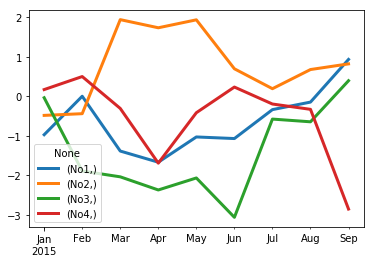

In [32]:
%matplotlib inline
df.cumsum().plot(lw=3.0)

# SERIES CLASS

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df['No1']

,No1
2015-01-31,-0.970112
2015-02-28,0.971875
2015-03-31,-1.384532
2015-04-30,-0.281863
2015-05-31,0.638012
2015-06-30,-0.040338
2015-07-31,0.730855
2015-08-31,0.190233
2015-09-30,1.077973


In [35]:
type(df['No1'])

pandas.core.frame.DataFrame

Text(0,0.5,'value')

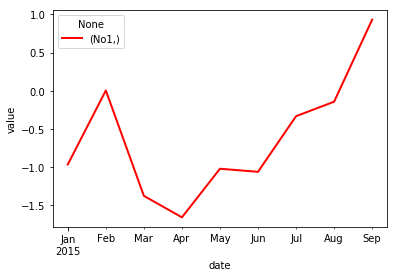

In [36]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

# GROUPBY OPERATIONS

In [37]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.970112,-0.481884,-0.035809,0.170269,Q1
2015-02-28,0.971875,0.043199,-1.851596,0.329073,Q1
2015-03-31,-1.384532,2.375828,-0.146689,-0.805511,Q1
2015-04-30,-0.281863,-0.205484,-0.331923,-1.382465,Q2
2015-05-31,0.638012,0.200770,0.303257,1.274502,Q2
2015-06-30,-0.040338,-1.236645,-0.994216,0.648087,Q2
2015-07-31,0.730855,-0.503214,2.481888,-0.428643,Q3
2015-08-31,0.190233,0.483870,-0.068781,-0.134308,Q3
2015-09-30,1.077973,0.143163,1.038233,-2.519411,Q3


In [38]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                           'Odd', 'Even', 'Odd']

In [45]:
import pandas_datareader.data as web
from datetime import datetime
f = web.DataReader('F', 'robinhood')
f.head()

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
F      2017-08-07   10.243500  10.299700         False  10.224700  10.262200   
       2017-08-08   10.215300  10.318500         False  10.205900  10.271600   
       2017-08-09   10.243500  10.271600         False  10.159000  10.205900   
       2017-08-10   10.102800  10.234100         False  10.102800  10.205900   
       2017-08-11   10.102800  10.168400         False  10.093400  10.121500   

                  session    volume  
symbol begins_at                     
F      2017-08-07     reg  35013023  
       2017-08-08     reg  26322101  
       2017-08-09     reg  32155872  
       2017-08-10     reg  31903827  
       2017-08-11     reg  32300117

In [46]:
f.to_csv('C:\Users\Taymour\stock.csv')

In [70]:
import pandas as pd
DAX = pd.read_csv("C:\Users\Taymour\stock.csv"), index_col='date'
DAX.head()

,date,close_price,high_price,low_price,open_price,volume
0,07/08/2017,10.2435,10.2997,10.2247,10.2622,35013023
1,08/08/2017,10.2153,10.3185,10.2059,10.2716,26322101
2,09/08/2017,10.2435,10.2716,10.1590,10.2059,32155872
3,10/08/2017,10.1028,10.2341,10.1028,10.2059,31903827
4,11/08/2017,10.1028,10.1684,10.0934,10.1215,32300117


In [71]:
DAX['date'] = pd.to_datetime(DAX['date'])
DAX = DAX.set_index('date')

In [72]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-07-08 to 2018-03-08
Data columns (total 5 columns):
close_price    251 non-null float64
high_price     251 non-null float64
low_price      251 non-null float64
open_price     251 non-null float64
volume         251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [73]:
DAX.head()

,close_price,high_price,low_price,open_price,volume
date,,,,,
2017-07-08,10.2435,10.2997,10.2247,10.2622,35013023
2017-08-08,10.2153,10.3185,10.2059,10.2716,26322101
2017-09-08,10.2435,10.2716,10.1590,10.2059,32155872
2017-10-08,10.1028,10.2341,10.1028,10.2059,31903827
2017-11-08,10.1028,10.1684,10.0934,10.1215,32300117


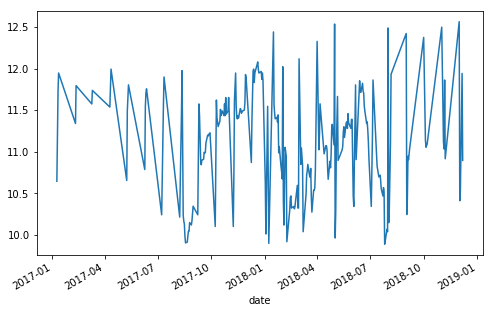

In [74]:
DAX['close_price'].plot(figsize=(8, 5))

In [78]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['close_price'][i] /
                                DAX['close_price'][i - 1])

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Wall time: 29.8 s


In [79]:
DAX[['close_price', 'Ret_Loop']].tail()

,close_price,Ret_Loop
date,,
2018-07-30,10.07,0.014000
2018-07-31,10.04,-0.002984
2018-01-08,9.90,-0.014042
2018-02-08,9.92,0.002018
2018-03-08,10.04,0.012024


In [84]:
%time DAX['Return'] = np.log(DAX['close_price'] / DAX['close_price'].shift(1))

Wall time: 483 ms


In [85]:
DAX[['close_price', 'Ret_Loop', 'Return']].tail()

,close_price,Ret_Loop,Return
date,,,
2018-07-30,10.07,0.014000,0.014000
2018-07-31,10.04,-0.002984,-0.002984
2018-01-08,9.90,-0.014042,-0.014042
2018-02-08,9.92,0.002018,0.002018
2018-03-08,10.04,0.012024,0.012024


In [86]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC98B38>,
      dtype=object)

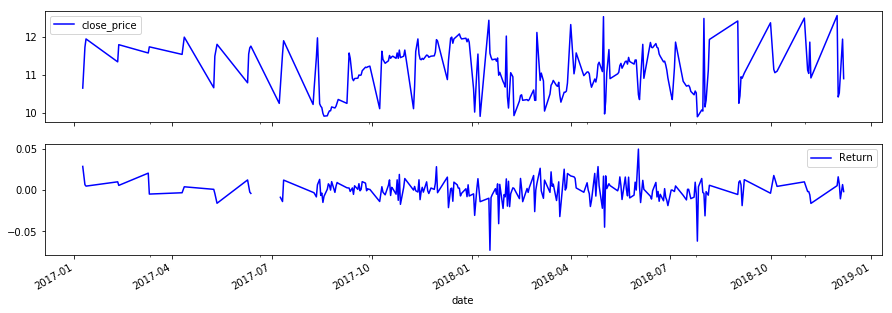

In [88]:
DAX[['close_price', 'Return']].plot(subplots=True, style='b',
                                    figsize=(15, 5))

# Regression Analysis

In [97]:
import pandas as pd
from urllib import urlretrieve

In [98]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, 'C:/Users/Taymour/es.txt')
urlretrieve(vs_url, 'C:/Users/Taymour/vs.txt')

('C:/Users/Taymour/vs.txt',
 <httplib.HTTPMessage instance at 0x000000000A79A488>)

In [105]:
lines = open('C:/Users/Taymour/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [106]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [107]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [109]:
new_file = open('C:/Users/Taymour/es50.txt', 'w') # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
# writes the corrected third line of the original file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orignial file
new_file.close()

In [111]:
new_lines = open('C:/Users/Taymour/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [112]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [113]:
es = pd.read_csv('C:/Users/Taymour/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [114]:
np.round(es.tail())

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\pandas\core\series.py:1828: RuntimeWarning: invalid value encountered in rint
  result = com._values_from_object(self).round(decimals)


,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [115]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [116]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [117]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [119]:
vs = pd.read_csv('C:/Users/Taymour/vs.txt', index_col=0, header=2,
                 parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [121]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                               vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [122]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


In [123]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CBE9978>,
      dtype=object)

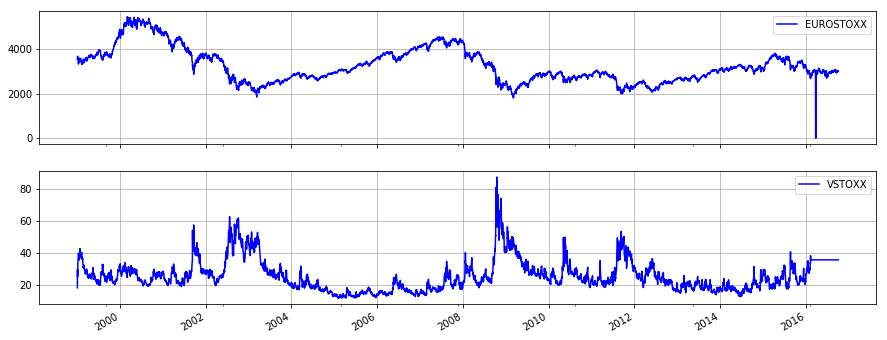

In [125]:
data.plot(subplots=True, grid=True, style='b', figsize=(15, 6))

In [126]:
rets = np.log(data / data.shift(1))
rets.head()

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAE3BE0>,
      dtype=object)

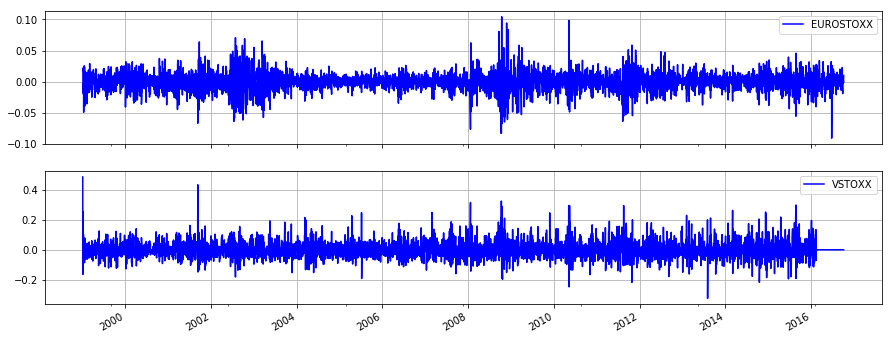

In [130]:
rets.plot(subplots=True, grid=True, style='b', figsize=(15, 6))